## Conclusions and Visualizations

In this notebook we make conclusions from the numerical results of the experiments. We will also make some visualizations to help us understand the results better.

Contents:

- plot 1: x: min gain - max gain, y: fraction of pairs with gain smaller than x

- plot 2: average variance over all pairs over time

- average cycle length
 
- plot 3

In [24]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re


In [25]:
file = "Barcelona.out"

with open(file) as f:
    global data
    
    lines = f.readlines()

    # filter out pairs that were not simulated    
    data = [line for line in lines if not line.startswith("Not enough routes ")]
    

# create a pandas dataframe to store the data
data_dict = {}

# iterate over the lines - each od pair starts with a "Running simulation for" line
for i, line in enumerate(data):
    
    if not line.startswith("Running simulation for"):
        continue
        
    # get the origin and destination
    origin = line.split()[-2]
    destination = line.split()[-1]
    
    data_dict[(origin, destination)] = {}
    
    conv_line = data[i+1]
    print(conv_line, "conv")
    data_dict[(origin, destination)]["convergence"] = -1
    if conv_line.startswith("Converged in"):
        # get the number of iterations
        data_dict[(origin, destination)]["convergence"] = int(conv_line.split()[-2])

    diff_line = data[i+2]
    print(diff_line, "diff")
    data_dict[(origin, destination)]["difference"] = float(diff_line.split()[-1])
    
    mean_line = data[i+3]
    # array of mean values (floats)
    match = re.findall(r"[-+]?\d*\.\d+|\d+", mean_line)
    
    if match:
        data_dict[(origin, destination)]["mean"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["mean"] = []
                
    variance_line = data[i+4]
    # array of variance values (floats)
    match = re.findall(r"[-+]?\d*\.\d+|\d+", variance_line)
    
    if match:
        data_dict[(origin, destination)]["variance"] = [float(x) for x in match]
    else:
        data_dict[(origin, destination)]["variance"] = []
        
    hist_line = data[i+5]
    # array of arrays of integers
    match = re.search(r"\[\[([0-9.,\s\[\]]+)\]\]", hist_line)
    
    if match:
        data_dict[(origin, destination)]["history"] = [list(map(int, x.split(",")) ) for x in match.group(1).split("], [")]
    else:
        data_dict[(origin, destination)]["history"] = []
    
    # get number of agents
    agents_line = data[i+6]
    data_dict[(origin, destination)]["agents"] = int(agents_line.split()[-1])

# data_dict

Converged in  3  steps
 conv
Difference for individual between UE and SO:  0.5888484848484854
 diff
Converged in  8  steps
 conv
Difference for individual between UE and SO:  0.39579582193484164
 diff
Converged in  51  steps
 conv
Difference for individual between UE and SO:  0.18396526677231906
 diff
Converged in  31  steps
 conv
Difference for individual between UE and SO:  0.47308355298941507
 diff
Converged in  10  steps
 conv
Difference for individual between UE and SO:  0.4230358699296026
 diff
Converged in  3  steps
 conv
Difference for individual between UE and SO:  0.47350331125827694
 diff
Converged in  3  steps
 conv
Difference for individual between UE and SO:  0.4736858006042315
 diff
Converged in  5  steps
 conv
Difference for individual between UE and SO:  0.33399999999999963
 diff
Did not converge for  1 101
 conv
Difference for individual between UE and SO:  0.670534077596308
 diff
Converged in  5  steps
 conv
Difference for individual between UE and SO:  0.01400201207

In [26]:
# use the data_dict to create a pandas dataframe
df = pd.DataFrame(data_dict).T

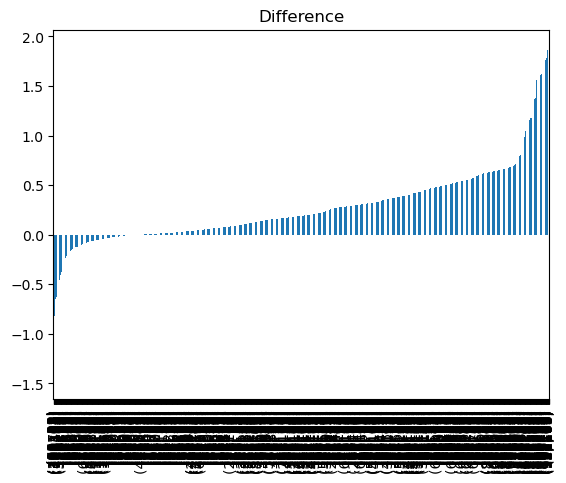

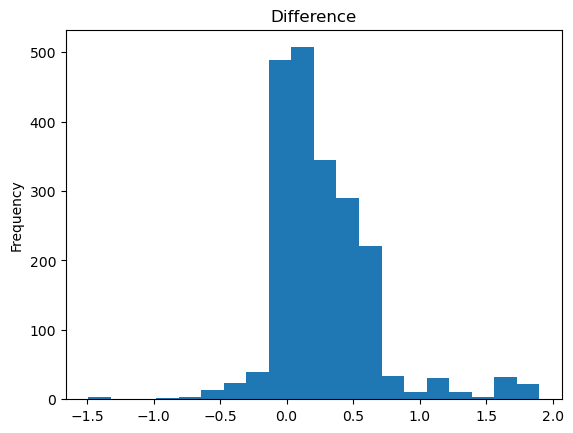

In [29]:
# create plots

# sort the df by the difference
df = df.sort_values(by="difference")

# plot the difference
plt.figure()
df["difference"].plot(kind="bar")
plt.title("Difference")
plt.show()

# create a histogram of the difference
plt.figure()
df["difference"].plot(kind="hist", bins=20)
plt.title("Difference")
plt.show()



In [31]:
# print percentage of negative differences
print("Percentage of negative differences: ", (df["difference"] < 0).sum() / len(df) * 100, "%")
# weighted percentage of negative differences
print("Weighted percentage of negative differences: ", (df["difference"] * df["agents"]).sum() / df["agents"].sum() * 100, "%")

Percentage of negative differences:  17.420596727622716 %
Weighted percentage of negative differences:  30.84726406366083 %


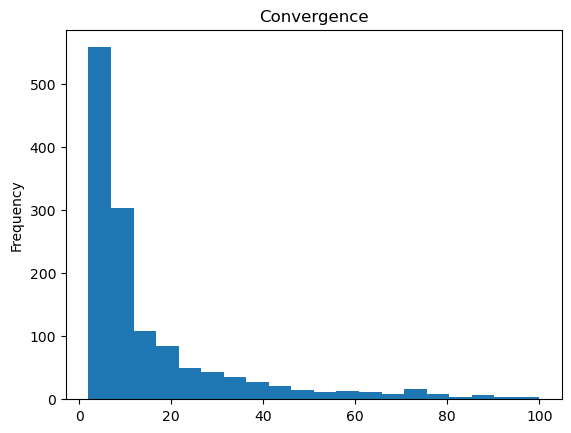

In [34]:
# lenght of the average cycle (convergence)
# filter out the pairs that did not converge
df2 = df[df["convergence"] != -1]
plt.figure()
df2["convergence"].plot(kind="hist", bins=20)
plt.title("Convergence")
plt.show()


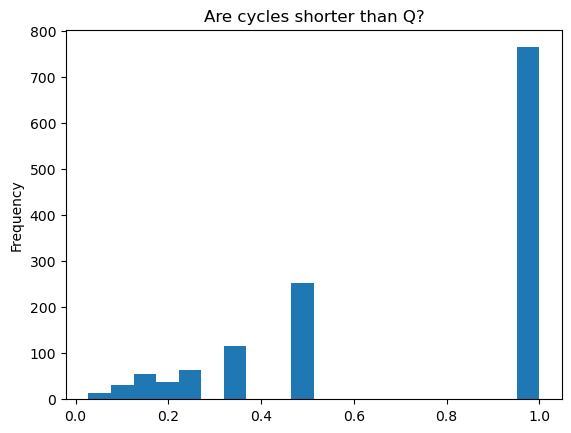

In [36]:
# convergence/agents
plt.figure()
(df2["convergence"] / df2["agents"]).plot(kind="hist", bins=20)
plt.title("Are cycles shorter than Q?")
plt.show()
